In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns

In [52]:
alg_label = ["Original",
             "Lqdags"]
        
queries_label = ["j3","j4","p2","p3","p4","s1","s2","s3","s4","t2","t3","t4","ti2","ti3","ti4","tr1","tr2"]

queries_title = ["J3","J4","P2","P3","P4","S1","S2","S3","S4","T2","T3","T4","Ti2","Ti3","Ti4","Tr1","Tr2"]

In [53]:
# box plots for each query
# TDO hacer un for para cada query y función y tamaño k
j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2 = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
data = [j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]

datasets = []
file = "results-time.csv"
file_lqdags = "results-time-v2.csv"
print(file)

original = pd.read_csv(f'../../original/{file}',delimiter=';')
original = original.head(4)



lqdags = pd.read_csv(f'../../lqdags/{file_lqdags}',delimiter=';')


datasets = [original,
               lqdags]

#   print(i)
for j,query in enumerate(queries_label):
    data[j] = [original[query],
                     lqdags[query]] 

results-time.csv


In [34]:
datasets[0]

,k,j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2
0,1,0.222298,1.10113,0.000824,0.009346,0.365405,0.001730,0.091122,0.146871,0.024774,0.000391,0.007848,0.597550,0.000773,0.187216,7.092131,0.000549,0.001269
1,10,0.340295,1.99874,0.005273,0.035670,0.761665,0.004638,0.323589,0.231186,0.086381,0.000888,0.022526,1.103797,0.002369,0.269213,14.647439,0.001399,0.004089
2,100,0.392995,2.46504,0.006814,0.043059,1.332730,0.006332,0.330499,0.233241,0.087133,0.003967,0.034088,4.552945,0.005723,0.591689,16.308443,0.001544,0.004239
3,1000,0.423903,3.02692,0.008749,0.045539,1.358260,0.006372,0.332324,0.235408,0.087520,0.005327,0.075095,5.439072,0.013344,1.497020,18.318348,0.001579,0.004722


In [20]:
datasets[0]['k']

0       1
1      10
2     100
3    1000
Name: k, dtype: int64

In [54]:
colors = ['#de2d26', '#3f007d']#, 'darkturquoise', 'mediumspringgreen', 'lime']
#linestyles = ['--', ':']  # Different patterns

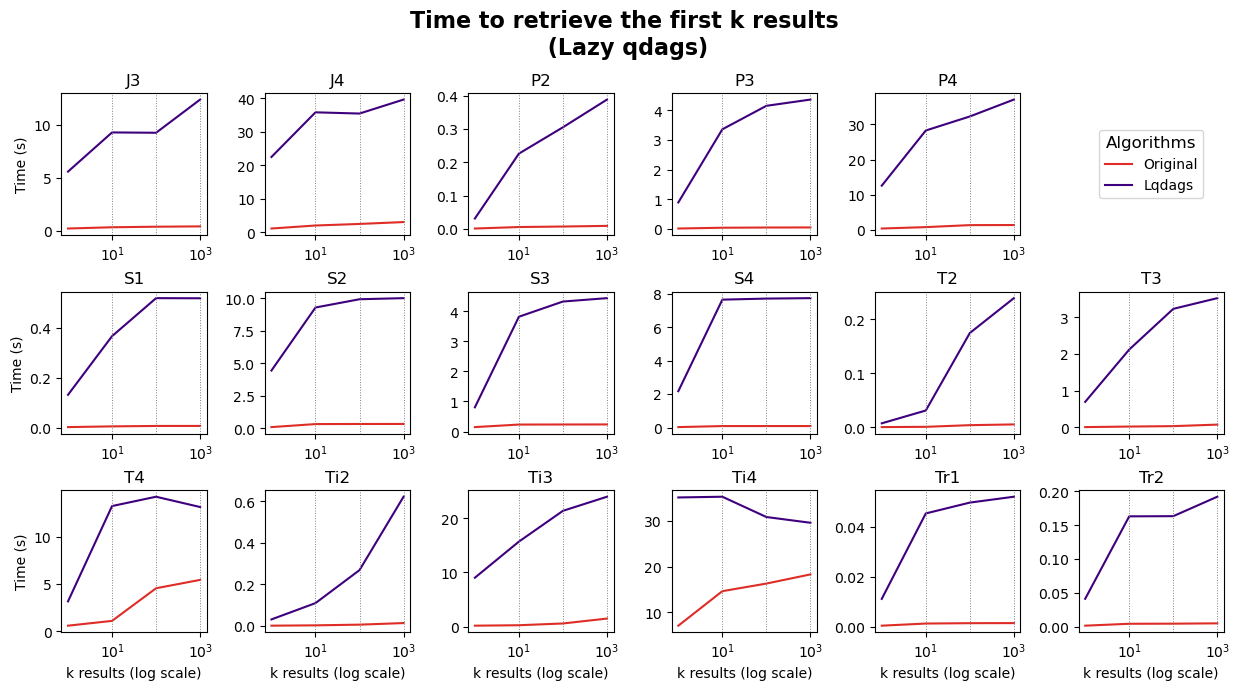

In [9]:
# Crear la figura
fig = plt.figure(figsize=(15, 7))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(3, 6, figure=fig, hspace=0.4, wspace=0.4)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 2])
p3 = fig.add_subplot(gs[0, 3])
p4 = fig.add_subplot(gs[0, 4])
color_legend = fig.add_subplot(gs[0, 5]) # Space for the legend
color_legend.axis('off')  # Hide the axis

s1 = fig.add_subplot(gs[1, 0])
s2 = fig.add_subplot(gs[1, 1])
s3 = fig.add_subplot(gs[1, 2])
s4 = fig.add_subplot(gs[1, 3])
t2 = fig.add_subplot(gs[1, 4])
t3 = fig.add_subplot(gs[1, 5])

t4 = fig.add_subplot(gs[2, 0])
ti2 = fig.add_subplot(gs[2, 1])
ti3 = fig.add_subplot(gs[2, 2])
ti4 = fig.add_subplot(gs[2, 3])
tr1 = fig.add_subplot(gs[2, 4])
tr2 = fig.add_subplot(gs[2, 5])

j3.set_ylabel('Time (s)')
s1.set_ylabel('Time (s)')
t4.set_ylabel('Time (s)')

t4.set_xlabel('k results (log scale)')
ti2.set_xlabel('k results (log scale)')
ti3.set_xlabel('k results (log scale)')
tr1.set_xlabel('k results (log scale)')
tr2.set_xlabel('k results (log scale)')
ti4.set_xlabel('k results (log scale)')

# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

#tr1.set_ylabel('Time (ms)')
# plot type_fun = 0
#type_fun=0

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)


for i,query in enumerate([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        query.plot(datasets[0]['k'], data[i][j], marker='', color=colors[j], label=alg_label[j])
    query.set_xscale('log')
    #query.set_yscale('log')
    query.set_title(queries_title[i])
    query.axvline(x=10, color='gray', linestyle=':', linewidth=0.7)
    query.axvline(x=100, color='gray', linestyle=':', linewidth=0.7)
    query.axvline(x=1000, color='gray', linestyle=':', linewidth=0.7)
        
handles, labels = j3.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='center',
    fontsize=10,  # Increase font size for the legend
    title='Algorithms',  # Add title
    title_fontsize=12  # Set font size for the title
)

# Global ylabel
#fig.text(0.07, 0.6, 'Number of nodes visited', va='center', rotation='vertical', fontsize=20)

# Add a title to the entire figure
fig.suptitle('Time to retrieve the first k results\n (Lazy qdags)', fontsize=16, fontweight='bold',y=1.0)


plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/lqdags_variablek-time-ppt.pdf')

plt.show()
 

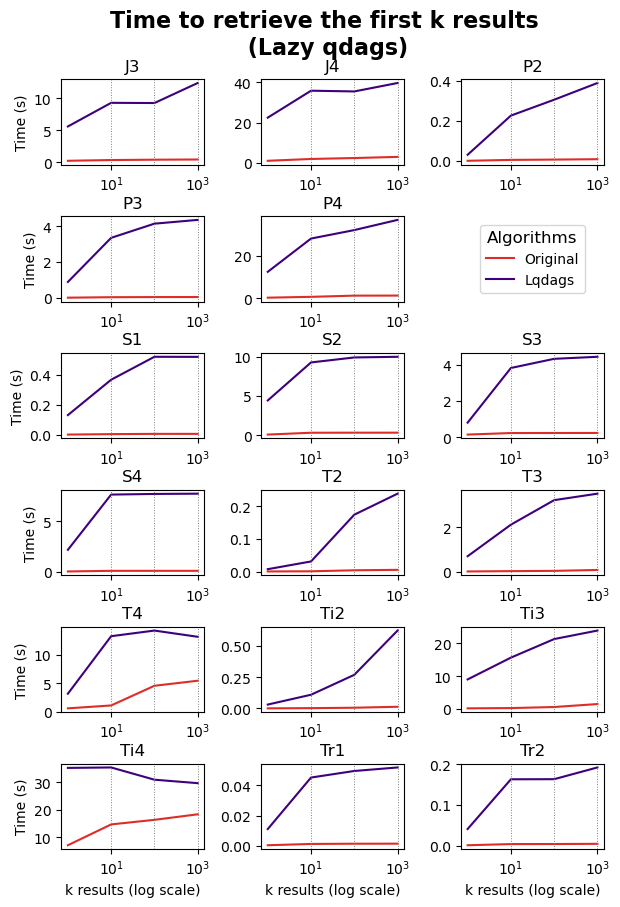

In [55]:
# Crear la figura
fig = plt.figure(figsize=(7, 10))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(6, 3, figure=fig, hspace=0.6, wspace=0.4)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 2])

p3 = fig.add_subplot(gs[1, 0])
p4 = fig.add_subplot(gs[1, 1])
color_legend = fig.add_subplot(gs[1, 2]) # Space for the legend
color_legend.axis('off')  # Hide the axis

s1 = fig.add_subplot(gs[2, 0])
s2 = fig.add_subplot(gs[2, 1])
s3 = fig.add_subplot(gs[2, 2])

s4 = fig.add_subplot(gs[3, 0])
t2 = fig.add_subplot(gs[3, 1])
t3 = fig.add_subplot(gs[3, 2])

t4 = fig.add_subplot(gs[4, 0])
ti2 = fig.add_subplot(gs[4, 1])
ti3 = fig.add_subplot(gs[4, 2])

ti4 = fig.add_subplot(gs[5, 0])
tr1 = fig.add_subplot(gs[5, 1])
tr2 = fig.add_subplot(gs[5, 2])

j3.set_ylabel('Time (s)')
p3.set_ylabel('Time (s)')
s1.set_ylabel('Time (s)')
s4.set_ylabel('Time (s)')
t4.set_ylabel('Time (s)')
ti4.set_ylabel('Time (s)')

tr1.set_xlabel('k results (log scale)')
tr2.set_xlabel('k results (log scale)')
ti4.set_xlabel('k results (log scale)')

# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

#tr1.set_ylabel('Time (ms)')
# plot type_fun = 0
#type_fun=0

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)


for i,query in enumerate([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        query.plot(datasets[0]['k'], data[i][j], marker='', color=colors[j], label=alg_label[j])
    query.set_xscale('log')
    #query.set_yscale('log')
    query.set_title(queries_title[i])
    query.axvline(x=10, color='gray', linestyle=':', linewidth=0.7)
    query.axvline(x=100, color='gray', linestyle=':', linewidth=0.7)
    query.axvline(x=1000, color='gray', linestyle=':', linewidth=0.7)
        
handles, labels = j3.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='center',
    fontsize=10,  # Increase font size for the legend
    title='Algorithms',  # Add title
    title_fontsize=12  # Set font size for the title
)

# Global ylabel
#fig.text(0.07, 0.6, 'Number of nodes visited', va='center', rotation='vertical', fontsize=20)

# Add a title to the entire figure
fig.suptitle('Time to retrieve the first k results\n (Lazy qdags)', fontsize=16, fontweight='bold',y=0.95)


plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/lqdags_variablek-time-tesis.pdf')

plt.show()
 

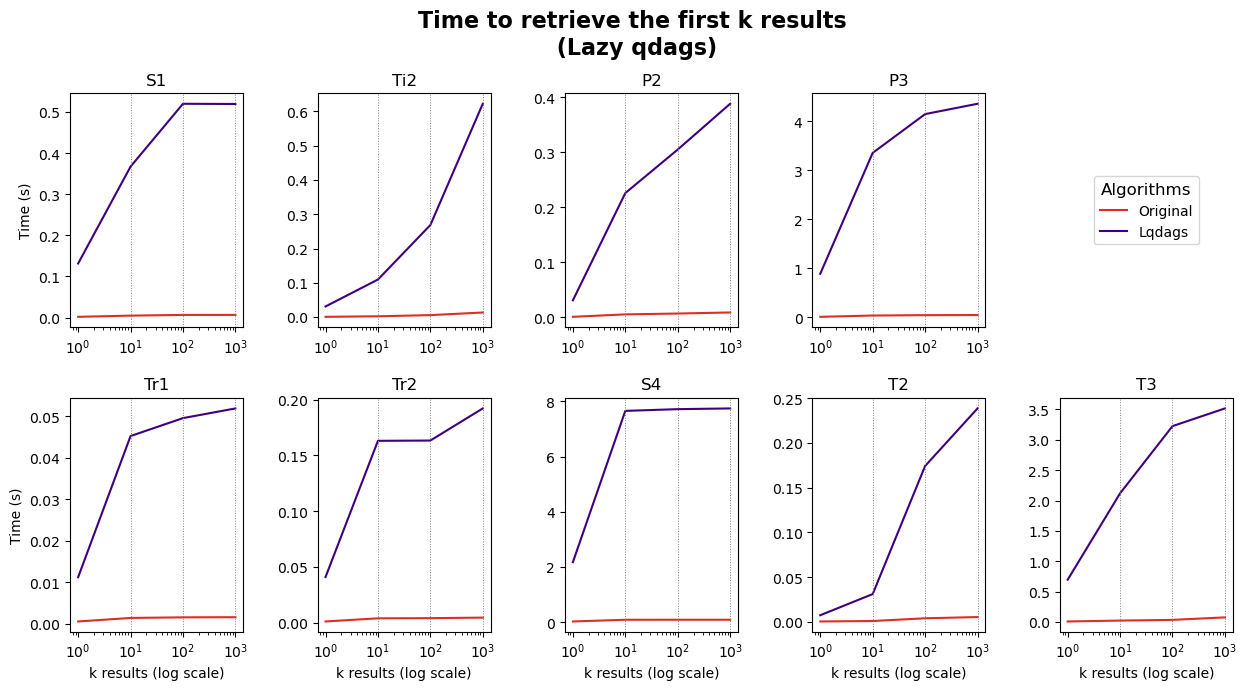

In [38]:
#ONLY THOSE NOT KILLED
# Crear la figura
fig = plt.figure(figsize=(15, 7))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(2, 5, figure=fig, hspace=0.3, wspace=0.43)

# Añadir los subplots a la figura
#j3 = fig.add_subplot(gs[0, 0])
#j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 2])
p3 = fig.add_subplot(gs[0, 3])
#p4 = fig.add_subplot(gs[0, 4])
color_legend = fig.add_subplot(gs[0, 4]) # Space for the legend
color_legend.axis('off')  # Hide the axis

s1 = fig.add_subplot(gs[0, 0])
#s2 = fig.add_subplot(gs[1, 1])
#s3 = fig.add_subplot(gs[1, 2])
s4 = fig.add_subplot(gs[1, 2])
t2 = fig.add_subplot(gs[1, 3])
t3 = fig.add_subplot(gs[1, 4])

#t4 = fig.add_subplot(gs[2, 0])
ti2 = fig.add_subplot(gs[0, 1])
#ti3 = fig.add_subplot(gs[2, 2])
#ti4 = fig.add_subplot(gs[2, 3])
tr1 = fig.add_subplot(gs[1, 0])
tr2 = fig.add_subplot(gs[1, 1])

s1.set_ylabel('Time (s)')
tr1.set_ylabel('Time (s)')


#ti2.set_xlabel('k results (log scale)')
s4.set_xlabel('k results (log scale)')
tr1.set_xlabel('k results (log scale)')
tr2.set_xlabel('k results (log scale)')
t2.set_xlabel('k results (log scale)')
t3.set_xlabel('k results (log scale)')

# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

#tr1.set_ylabel('Time (ms)')
# plot type_fun = 0
#type_fun=0

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)


for i,query in enumerate([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        if(not isinstance(query,list)):
            query.plot(datasets[0]['k'], data[i][j], marker='', color=colors[j], label=alg_label[j])
    if(not isinstance(query,list)):
        query.set_xscale('log')
        #query.set_yscale('log')
        query.set_title(queries_title[i])
        query.axvline(x=10, color='gray', linestyle=':', linewidth=0.7)
        query.axvline(x=100, color='gray', linestyle=':', linewidth=0.7)
        query.axvline(x=1000, color='gray', linestyle=':', linewidth=0.7)
        
handles, labels = s1.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='center',
    fontsize=10,  # Increase font size for the legend
    title='Algorithms',  # Add title
    title_fontsize=12  # Set font size for the title
)

# Global ylabel
#fig.text(0.07, 0.6, 'Number of nodes visited', va='center', rotation='vertical', fontsize=20)

fig.suptitle('Time to retrieve the first k results\n (Lazy qdags)', fontsize=16, fontweight='bold',y=1.0)


plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/lqdags_variablek-time-ppt.pdf')

plt.show()
 

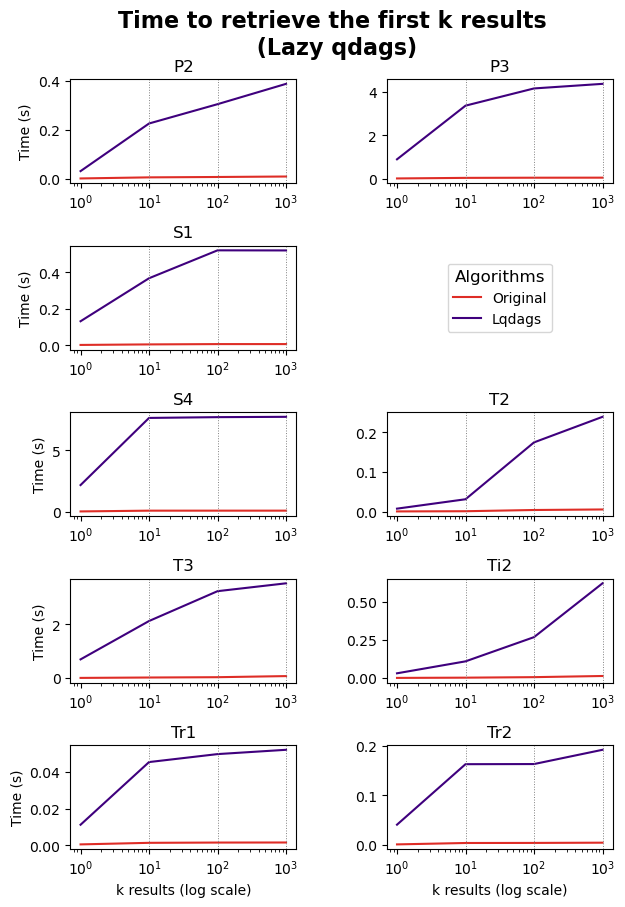

In [56]:
#ONLY THOSE NOT KILLED
# Crear la figura
fig = plt.figure(figsize=(7,10))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(5, 2, figure=fig, hspace=0.6, wspace=0.4)

# Añadir los subplots a la figura
#j3 = fig.add_subplot(gs[0, 0])
#j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 0])
p3 = fig.add_subplot(gs[0, 1])
#p4 = fig.add_subplot(gs[0, 4])
color_legend = fig.add_subplot(gs[1, 1]) # Space for the legend
color_legend.axis('off')  # Hide the axis

s1 = fig.add_subplot(gs[1, 0])
#s2 = fig.add_subplot(gs[1, 1])
#s3 = fig.add_subplot(gs[1, 2])
s4 = fig.add_subplot(gs[2, 0])
t2 = fig.add_subplot(gs[2, 1])
t3 = fig.add_subplot(gs[3, 0])

#t4 = fig.add_subplot(gs[2, 0])
ti2 = fig.add_subplot(gs[3, 1])
#ti3 = fig.add_subplot(gs[2, 2])
#ti4 = fig.add_subplot(gs[2, 3])
tr1 = fig.add_subplot(gs[4, 0])
tr2 = fig.add_subplot(gs[4, 1])

p2.set_ylabel('Time (s)')
s1.set_ylabel('Time (s)')
s4.set_ylabel('Time (s)')
t3.set_ylabel('Time (s)')
tr1.set_ylabel('Time (s)')


#ti2.set_xlabel('k results (log scale)')
tr1.set_xlabel('k results (log scale)')
tr2.set_xlabel('k results (log scale)')

# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

#tr1.set_ylabel('Time (ms)')
# plot type_fun = 0
#type_fun=0

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)


for i,query in enumerate([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        if(not isinstance(query,list)):
            query.plot(datasets[0]['k'], data[i][j], marker='', color=colors[j], label=alg_label[j])
    if(not isinstance(query,list)):
        query.set_xscale('log')
        #query.set_yscale('log')
        query.set_title(queries_title[i])
        query.axvline(x=10, color='gray', linestyle=':', linewidth=0.7)
        query.axvline(x=100, color='gray', linestyle=':', linewidth=0.7)
        query.axvline(x=1000, color='gray', linestyle=':', linewidth=0.7)
        
handles, labels = s1.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='center',
    fontsize=10,  # Increase font size for the legend
    title='Algorithms',  # Add title
    title_fontsize=12  # Set font size for the title
)

# Global ylabel
#fig.text(0.07, 0.6, 'Number of nodes visited', va='center', rotation='vertical', fontsize=20)

fig.suptitle('Time to retrieve the first k results\n (Lazy qdags)', fontsize=16, fontweight='bold',y=0.95)


plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/lqdags_variablek-time-tesis.pdf')

plt.show()
 

In [37]:
## SECOND SCENARIO --> V1000

In [57]:

alg_label = ["Original",
            "Lqdags"]
queries_title_v1000 = ["J3","J4","P2","P3","P4","S3","T2","T3","T4","Ti2","Ti3"] #"S3","T3","Ti4 (log scale)"
queries_label_v1000=["j3","j4","p2","p3","p4","s3","t2","t3","t4","ti2","ti3"] # "s3", "t3","ti4"

In [58]:
j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2 = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
data_v1000 = [j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]
datasets_v1000 =[]

file = "results-v1000-time.csv"
file_lqdags = "results-v1000-time-v2.csv"
#print(file)

original = pd.read_csv(f'../../query1000results/original/results-v1000-time.csv',delimiter=';')
original = original.head(4)
# Drop columns where all values are zero
original = original.loc[:, (original != 0).any(axis=0)]

lqdags = pd.read_csv(f'../../query1000results/lqdags/{file_lqdags}',delimiter=';')
# Drop columns where all values are zero
lqdags = lqdags.loc[:, (lqdags != 0).any(axis=0)]


datasets_v1000 = [original,
                     lqdags]

#   print(i)
for j,query in enumerate(queries_label_v1000):
    data_v1000[j] = [original[query],
                     lqdags[query]]
        

In [59]:
datasets_v1000[0]

,k,j3,j4,p2,p3,p4,s3,t2,t3,t4,ti2,ti3,ti4
0,1,0.002881,0.002181,0.000190,0.003853,0.297561,0.000121,0.000275,0.000147,0.000159,0.000540,0.506698,14.0213
1,10,0.003235,0.002594,0.000294,0.006542,1.925360,0.000137,0.000476,0.000265,0.000605,0.000739,0.544883,14.1576
2,100,0.009926,0.031098,0.001176,0.010522,1.953750,0.000318,0.006859,0.026824,0.001357,0.002293,2.084030,28.1117
3,1000,0.072807,0.107832,0.006789,0.019367,1.963840,0.002043,0.013011,1.969500,0.023579,0.027051,3.092490,162.6340


In [27]:
datasets_v1000[1]

,k,j3,j4,p2,p3,p4,s3,t2,t3,t4,ti2,ti3
1,0.235327,0.43352,0.000692,0.317437,10.1333,0.000254,0.000285,0.000521,0.001705,0.013619,10.7948,10.4717
10,0.249990,0.51486,0.004594,0.577034,76.0635,0.001010,0.008042,0.007631,0.085104,0.023966,15.3455,12.4432
100,0.940340,6.57678,0.042462,0.950264,78.6054,0.010088,0.299864,2.639070,0.243461,0.093823,17.7133,NaN
1000,7.036420,23.08290,0.272480,1.724050,80.4589,0.092924,0.548468,4.829620,1.163990,40.264700,NaN,NaN


In [14]:
datasets_v1000[0]['k']

0       1
1      10
2     100
3    1000
Name: k, dtype: int64

In [60]:
colors = ['#de2d26', '#3f007d']#, 'darkturquoise', 'mediumspringgreen', 'lime']
#linestyles = ['--', ':']  # Different patterns

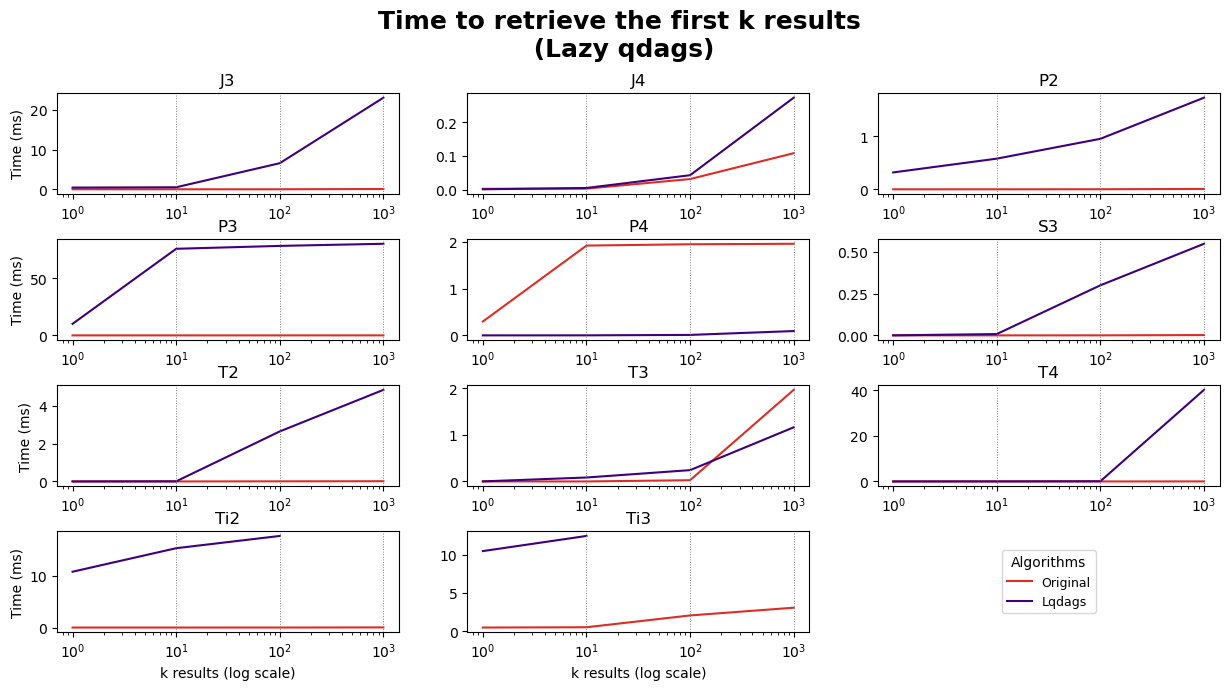

In [42]:
# Crear la figura
fig = plt.figure(figsize=(15, 7))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(4, 3, figure=fig, hspace=0.45, wspace=0.2)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 2])

p3 = fig.add_subplot(gs[1, 0])
p4 = fig.add_subplot(gs[1, 1])
s3 = fig.add_subplot(gs[1, 2])

t2 = fig.add_subplot(gs[2, 0])
t3 = fig.add_subplot(gs[2, 1])
t4 = fig.add_subplot(gs[2, 2])


ti2 = fig.add_subplot(gs[3, 0])
ti3 = fig.add_subplot(gs[3, 1])
color_legend = fig.add_subplot(gs[3, 2]) # Space for the legend
color_legend.axis('off')  # Hide the axis

j3.set_ylabel('Time (ms)')
p3.set_ylabel('Time (ms)')
t2.set_ylabel('Time (ms)')
ti2.set_ylabel('Time (ms)')

ti2.set_xlabel('k results (log scale)')
ti3.set_xlabel('k results (log scale)')
# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)

for i,query in enumerate([j3,j4,p2,p3,p4,s3,t2,t3,t4,ti2,ti3]): #([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        query.plot(datasets_v1000[0]['k'], data_v1000[i][j], marker='', color=colors[j], label=alg_label[j])
    query.set_xscale('log')
    #query.set_yscale('log')
    query.set_title(queries_title_v1000[i])
    query.axvline(x=10, color='gray', linestyle=':', linewidth=0.7)
    query.axvline(x=100, color='gray', linestyle=':', linewidth=0.7)
    query.axvline(x=1000, color='gray', linestyle=':', linewidth=0.7)
handles, labels = j3.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='center',
    fontsize=9,  # Increase font size for the legend
    title='Algorithms',  # Add title
    title_fontsize=10  # Set font size for the title
)

# Global ylabel
#fig.text(0.07, 0.6, 'Number of nodes visited', va='center', rotation='vertical', fontsize=20)

# Add a title to the entire figure
fig.suptitle('Time to retrieve the first k results\n (Lazy qdags)', fontsize=18, fontweight='bold',y=1.0)


plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/lqdags_variablek-v1000-time-ppt.pdf')

plt.show()
 

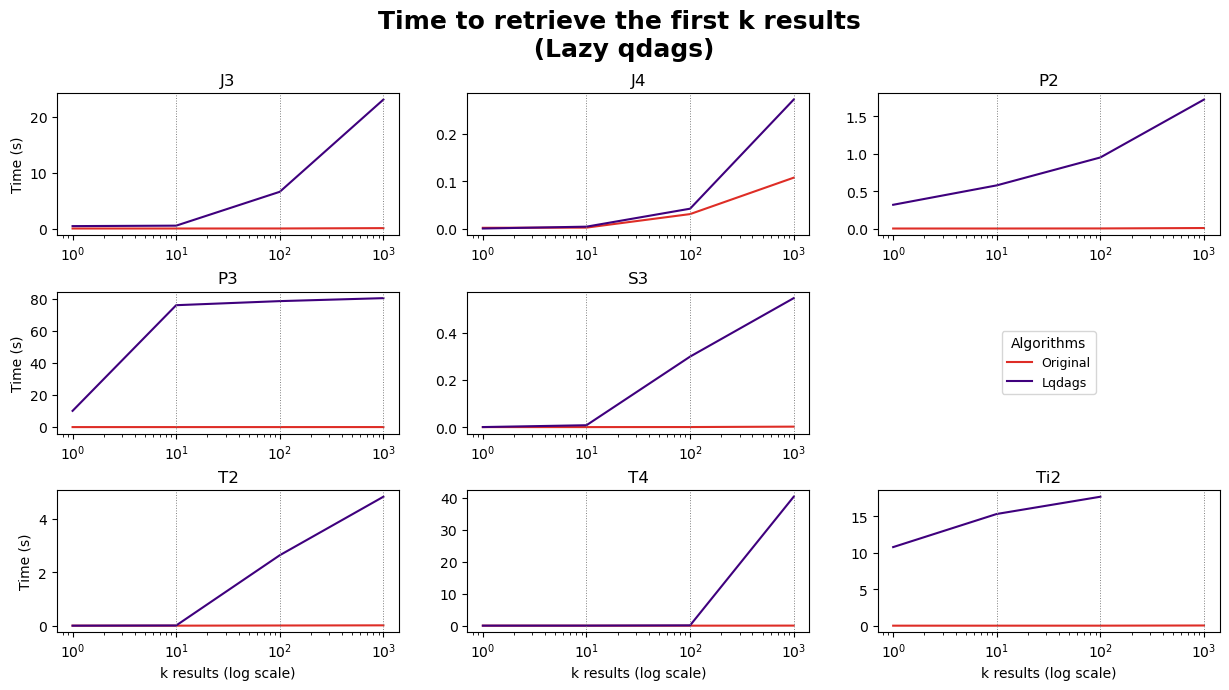

In [44]:
# ONLy
# Crear la figura
fig = plt.figure(figsize=(15, 7))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(3, 3, figure=fig, hspace=0.4, wspace=0.2)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 2])

p3 = fig.add_subplot(gs[1, 0])
#p4 = fig.add_subplot(gs[1, 1])
s3 = fig.add_subplot(gs[1, 1])
color_legend = fig.add_subplot(gs[1, 2]) # Space for the legend
color_legend.axis('off')  # Hide the axis

t2 = fig.add_subplot(gs[2, 0])
#t3 = fig.add_subplot(gs[2, 1])
t4 = fig.add_subplot(gs[2, 1])


ti2 = fig.add_subplot(gs[2, 2])
#ti3 = fig.add_subplot(gs[3, 1])
#color_legend = fig.add_subplot(gs[3, 2]) # Space for the legend
#color_legend.axis('off')  # Hide the axis

j3.set_ylabel('Time (s)')
p3.set_ylabel('Time (s)')
t2.set_ylabel('Time (s)')
#ti2.set_ylabel('Nodes visited')

t2.set_xlabel('k results (log scale)')
t4.set_xlabel('k results (log scale)')
ti2.set_xlabel('k results (log scale)')
#ti3.set_xlabel('k results (log scale)')
# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)

for i,query in enumerate([j3,j4,p2,p3,p4,s3,t2,t3,t4,ti2,ti3]): #([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        if(not isinstance(query,list)):
            query.plot(datasets_v1000[0]['k'], data_v1000[i][j], marker='', color=colors[j], label=alg_label[j])
    if(not isinstance(query,list)):
        query.set_xscale('log')
        #query.set_yscale('log')
        query.set_title(queries_title_v1000[i])
        query.axvline(x=10, color='gray', linestyle=':', linewidth=0.7)
        query.axvline(x=100, color='gray', linestyle=':', linewidth=0.7)
        query.axvline(x=1000, color='gray', linestyle=':', linewidth=0.7)
handles, labels = j3.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='center',
    fontsize=9,  # Increase font size for the legend
    title='Algorithms',  # Add title
    title_fontsize=10  # Set font size for the title
)

# Global ylabel
#fig.text(0.07, 0.6, 'Number of nodes visited', va='center', rotation='vertical', fontsize=20)

fig.suptitle('Time to retrieve the first k results\n (Lazy qdags)', fontsize=18, fontweight='bold',y=1.0)


plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/lqdags_variablek-v1000-time-ppt.pdf')

plt.show()
 

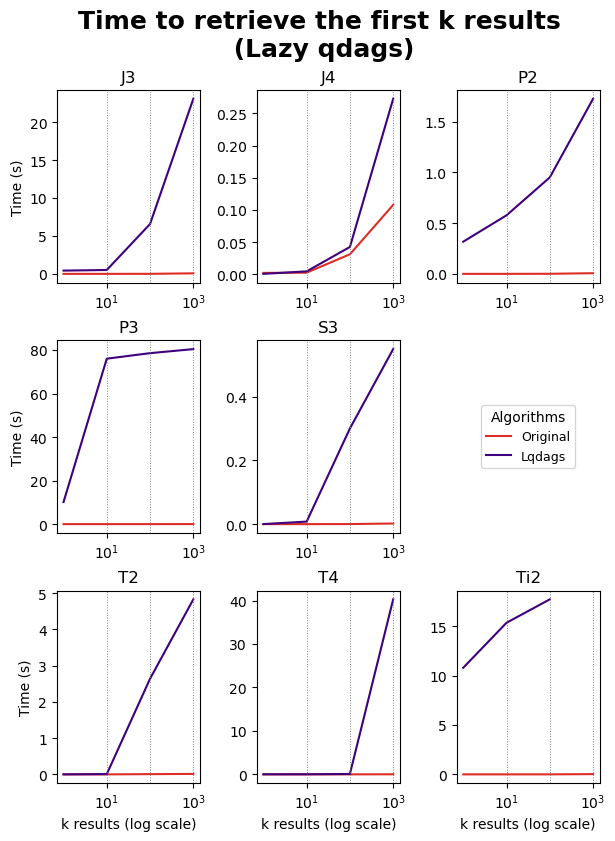

In [63]:
# ONLy
# Crear la figura
fig = plt.figure(figsize=(7,9))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(3, 3, figure=fig, hspace=0.3, wspace=0.4)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 2])

p3 = fig.add_subplot(gs[1, 0])
#p4 = fig.add_subplot(gs[1, 1])
s3 = fig.add_subplot(gs[1, 1])
color_legend = fig.add_subplot(gs[1, 2]) # Space for the legend
color_legend.axis('off')  # Hide the axis

t2 = fig.add_subplot(gs[2, 0])
#t3 = fig.add_subplot(gs[2, 1])
t4 = fig.add_subplot(gs[2, 1])


ti2 = fig.add_subplot(gs[2, 2])
#ti3 = fig.add_subplot(gs[3, 1])
#color_legend = fig.add_subplot(gs[3, 2]) # Space for the legend
#color_legend.axis('off')  # Hide the axis

j3.set_ylabel('Time (s)')
p3.set_ylabel('Time (s)')
t2.set_ylabel('Time (s)')
#ti2.set_ylabel('Nodes visited')

t2.set_xlabel('k results (log scale)')
t4.set_xlabel('k results (log scale)')
ti2.set_xlabel('k results (log scale)')
#ti3.set_xlabel('k results (log scale)')
# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)

for i,query in enumerate([j3,j4,p2,p3,p4,s3,t2,t3,t4,ti2,ti3]): #([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        if(not isinstance(query,list)):
            query.plot(datasets_v1000[0]['k'], data_v1000[i][j], marker='', color=colors[j], label=alg_label[j])
    if(not isinstance(query,list)):
        query.set_xscale('log')
        #query.set_yscale('log')
        query.set_title(queries_title_v1000[i])
        query.axvline(x=10, color='gray', linestyle=':', linewidth=0.7)
        query.axvline(x=100, color='gray', linestyle=':', linewidth=0.7)
        query.axvline(x=1000, color='gray', linestyle=':', linewidth=0.7)
handles, labels = j3.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='center',
    fontsize=9,  # Increase font size for the legend
    title='Algorithms',  # Add title
    title_fontsize=10  # Set font size for the title
)

# Global ylabel
#fig.text(0.07, 0.6, 'Number of nodes visited', va='center', rotation='vertical', fontsize=20)

fig.suptitle('Time to retrieve the first k results\n (Lazy qdags)', fontsize=18, fontweight='bold',y=0.97)


plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/lqdags_variablek-v1000-time-tesis.pdf')

plt.show()
 